In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.57MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.18MB/s]


In [ ]:
print('transform:', type(transform))
print('train_dataset:', type(train_dataset))
print('test_dataset:', type(test_dataset))

transform: <class 'torchvision.transforms.transforms.ToTensor'>
train_dataset: <class 'torchvision.datasets.mnist.MNIST'>
test_dataset: <class 'torchvision.datasets.mnist.MNIST'>


In [ ]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
from matplotlib import pyplot as plt

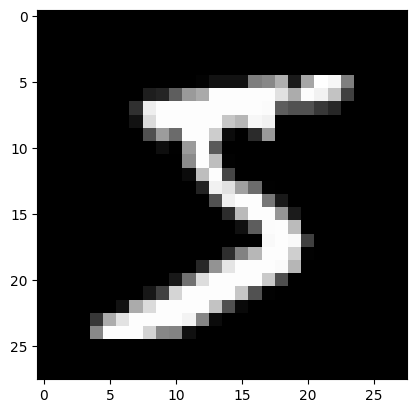

In [ ]:
plt.imshow(train_dataset[0][0].squeeze(), cmap='gray')

In [ ]:
# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

In [ ]:
# data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
# setting up gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# fully connected feed forward network
class Fully_Connected(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(784, 784)
    self.l2 = nn.Linear(784, 784)
    self.l3 = nn.Linear(784, 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    out = self.relu(out)
    out = self.l3(out)
    return out

In [ ]:
import os

def save_model_snapshot(model, epoch, num):
    os.makedirs('snapshots', exist_ok=True)
    torch.save(model.state_dict(), f'snapshots/epoch{epoch}_snap_{num}.pt')

In [ ]:
model = Fully_Connected().to(device)

# initially saving the parameters of the models before any descent
save_model_snapshot(model, 0, 'inititial')

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    data = data.to(device)
    targets = targets.to(device)
    data = data.reshape(data.shape[0], -1)

    # forward
    output = model(data)
    loss = criterion(output, targets)

    # backward
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch_idx % 100 == 0:


      # checking the accuracy against test set
      with torch.no_grad():
        num_correct = 0
        num_samples = 0
        for batch_idx, (data, targets) in enumerate(test_loader):
          data = data.to(device)
          targets = targets.to(device)
          data = data.reshape(data.shape[0], -1)
          output = model(data)
          _, predictions = output.max(1)
          num_correct += (predictions == targets).sum()
          num_samples += predictions.size(0)

      print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx+1}/{len(train_loader)}, Loss: {loss.item():.4f}, Accuracy: {float(num_correct)/float(num_samples)*100:.2f}')

    # saving the model after every third epoch
    if batch_idx % (len(train_loader)//3) == 0:
      save_model_snapshot(model, epoch+1, batch_idx // (len(train_loader)//3) + 1)

# save the final model
save_model_snapshot(model, num_epochs, 'final')

Epoch: 1/10, Batch: 157/938, Loss: 2.3019, Accuracy: 22.63
Epoch: 1/10, Batch: 157/938, Loss: 0.3617, Accuracy: 92.28
Epoch: 1/10, Batch: 157/938, Loss: 0.2243, Accuracy: 93.65
Epoch: 1/10, Batch: 157/938, Loss: 0.1002, Accuracy: 94.47
Epoch: 1/10, Batch: 157/938, Loss: 0.2033, Accuracy: 95.50
Epoch: 1/10, Batch: 157/938, Loss: 0.2312, Accuracy: 95.76
Epoch: 1/10, Batch: 157/938, Loss: 0.2264, Accuracy: 96.18
Epoch: 1/10, Batch: 157/938, Loss: 0.0800, Accuracy: 96.78
Epoch: 1/10, Batch: 157/938, Loss: 0.1906, Accuracy: 96.45
Epoch: 1/10, Batch: 157/938, Loss: 0.2361, Accuracy: 97.21
Epoch: 2/10, Batch: 157/938, Loss: 0.0253, Accuracy: 97.25
Epoch: 2/10, Batch: 157/938, Loss: 0.1023, Accuracy: 96.57
Epoch: 2/10, Batch: 157/938, Loss: 0.0843, Accuracy: 96.75
Epoch: 2/10, Batch: 157/938, Loss: 0.2091, Accuracy: 97.39
Epoch: 2/10, Batch: 157/938, Loss: 0.2003, Accuracy: 97.68
Epoch: 2/10, Batch: 157/938, Loss: 0.0677, Accuracy: 97.57
Epoch: 2/10, Batch: 157/938, Loss: 0.0603, Accuracy: 97.

In [ ]:
import shutil
from google.colab import files

shutil.make_archive('snapshots', 'zip', 'snapshots')

'/content/snapshots.zip'